In [ ]:
# Descriptive Stats: Thống kê mô tả
# Có thực sự có mối liên hệ không, hay do ngẫu nhiên mà có
  # Statistical Significance (Ý nghĩa về mặt thống kê hay không)
  # Inferential Statistics: thống kê suy luận -> Hypothesis Testing: kiểm định giả thuyết

# Hypothesis Testing: Kiểm định giả thuyết
# Đặt ra giả thuyết
  # Null hypothesis (Giả thuyết không)
  # Alternative hypothesis (Giả thuyết thay thế)
  # Để chứng minh được giả thuyết thay thế là đúng, chúng ta cần bác bỏ được giả thuyết không
  # Trong trường hợp không bác bỏ được giả thuyết không,
    # chúng ta chưa để căn cứ để chứng minh giả thuyết thay thế là đúng

# Kiểm định giả thuyết về giá trị trung bình:
  # Ban đầu, điểm thi là 60 điểm.
    # Sau khi áp dụng cách dạy mới, điểm trung bình của học sinh lớp phân tích dữ liệu có thay đổi không?
      # H0: = 60
      # H1: khác 60
      # có thể nhỏ hơn 60, có thể lớn hơn 60 -> 2 tail hypothesis
    # Sau khi áp dụng cách dạy mới, điểm trung bình có tăng lên không
      # H0: <=60
      # H1: >60
    # Sau khi áp dụng cách dạy mới, điểm trung bình có bị giảm đi không
      # H0: >=60
      # H1: <60
# Kiểm định giả thuyết so sánh giá trị trung bình:
  # Có 2 logo, cần chọn xem nên dùng logo nào cho trang facebook quảng cáo.
  # Tiêu chí để chọn xem nên dùng logo nào dựa vào số lượt click trung bình cho mỗi logo. (A/B Testing)
  # Số lượt click của hai logo có khác nhau không?
    # H0: x1-x2=0
    # H1: x1-x2 khác 0
  # Số lượt click của logo 1 có nhiều hơn logo 2 không?
    # H0: x1-x2 <= 0
    # H1: x1-x2 > 0
# Kiểm định giả thuyết so sánh cặp giá trị:
  # Tiên có cửa hàng bán quần áo. Tiên muốn chạy quảng cáo cho cửa hàng, dự định là tiêu $10,000 để chạy quảng cáo.
  # Mong muốn: sau khi chạy quảng cáo, doanh thu đem về sẽ nhiều hơn doanh thu ban đầu $60,000 một tháng
  # H0: x2 - x1 <= 60000
  # H1: x2 - x1 > 60000

# Sau khi đặt ra các giả thuyết, xem có bác bỏ được Null Hypothesis không?
  # Cách hiểu p-value
    # Nhìn vào p-value: xác suất Null Hypothesis đúng
    # Muốn bác bỏ được Null Hypothesis, p-value phải càng nhỏ càng tốt
    # p-value < 0.05 -> bác bỏ Null Hypothesis
  # Cách tính p-value:
    # Trong trường hợp có đầy đủ dữ liệu của dân số (population) -> Z-statistics (Z-score)
    # Đa phần chúng ta chỉ có dữ liệu mẫu -> T-statistics (ttest)



In [ ]:
# Tiếp tục thực hành
# Quay lại bài Quảng Cáo

# Mô tả dữ liệu (phân tích dữ liệu) (Descriptive Stats) -> cho biết tình hình hiện tại của doanh nghiệp ra sao
  # -> Data Analyst, BI Analyst
# Dựa trên tình hình hiện tại (cả quá khứ), dự đoán tương lai (Predictive Stats)
  # Dự đoán doanh thu dựa trên số tiền tiêu cho quảng cáo
  # -> Data Scientist
# Dự đoán được là nếu tiêu 10,000 đô vào quảng cáo trên TV, thì doanh số sẽ tăng lên thành bán được 60,000 sản phẩm
  # Ước tính -> thử mô hình (lấy mẫu) lên 10 cửa hàng -> kiểm định giả thuyết
  # Chạy trong 3 tháng -> Sau 3 tháng chạy mô hình (sau 3 tháng chạy quảng cáo), doanh thu có tăng lên 60,000 sản phẩm không?
  # -> Đưa ra giả pháp và kiểm tra (Prescriptive Statistics)

# => Làm hết cả 3: Manager

# [Thực hành] phân tích dữ liệu trên bộ dữ liệu Quản lý chất lượng

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Quality.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Sample 1,Sample 2,Sample 3,Sample 4
0,11.55,11.62,11.91,12.02
1,11.62,11.69,11.36,12.02
2,11.52,11.59,11.75,12.05
3,11.75,11.82,11.95,12.18
4,11.90,11.97,12.14,12.11


Quality Associates là một công ty tư vấn cho khách hàng về việc lấy mẫu và quản lý chất lượng cho quá trình sản xuất. Một khách hàng gửi cho Quality Associates một bộ dữ liệu chứa thông tin của 800 mẫu sản xuất trong điều kiện nhà máy hoạt động tốt và khách hàng cho rằng trọng lượng trung bình của mỗi gói hàng là 12, và độ lệch không quá 0.21. Để kiểm tra lại, Quality Associates gợi ý khách hàng rằng sẽ lấy ngẫu nhiên các 4 mẫu dữ liệu mới, mỗi mẫu chứa 30 sản phẩm. Để kiểm định rằng hoạt động của nhà máy của khách hàng có tốt như những gì họ nghĩ hay không, đại diện cho Quality Associates bạn hãy thực hiện những phân tích kiểm định chất lượng giúp khách hàng. Dữ liệu được để trong file Quality.xlsx

Yêu cầu: Tiến hành viết giả thuyết kiểm định về chất lượng sản phẩm với mức ý nghĩa 0.01

In [ ]:
# 4 mẫu dữ liệu mới, mỗi mẫu chứa 30 sản phẩm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample 1  30 non-null     float64
 1   Sample 2  30 non-null     float64
 2   Sample 3  30 non-null     float64
 3   Sample 4  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [ ]:
# Kiểm định chất lượng sản phẩm với mức ý nghĩa 0.01
# p_value < 0.01
# Thế nào là chất lượng? -> kiểm tra xem có đúng là trọng lượng mỗi gói hàng là 12 thật không?

In [ ]:
df.describe()

,Sample 1,Sample 2,Sample 3,Sample 4
count,30.000000,30.000000,30.000000,30.000000
mean,11.958667,12.028667,11.889000,12.081333
std,0.220356,0.220356,0.207171,0.206109
min,11.520000,11.590000,11.360000,11.640000
25%,11.812500,11.882500,11.752500,11.982500
50%,11.955000,12.025000,11.920000,12.080000
75%,12.145000,12.215000,11.997500,12.227500
max,12.320000,12.390000,12.220000,12.470000


In [ ]:
# 11.95, 12.02, 11.88, 12.08 -> có thể có
# kiểm tra trọng lượng trung bình có bằng 12 thật không
# nói cách khác, kiểm tra xem 11.95, 12.02... có thực sự lệch khỏi 12 không?
  # lệch đấy có đáng kể về mặt thống kê hay không?

In [ ]:
# H0:=12
# H1:khác 12

In [ ]:
# chuẩn bị dữ liệu
sample=pd.concat([df['Sample 1'], df['Sample 2'], df['Sample 3'], df['Sample 4']]).reset_index(drop=True)

In [ ]:
stats.ttest_1samp(sample,12)

TtestResult(statistic=-0.5196355789314843, pvalue=0.6042828222996104, df=119)

In [ ]:
# pvalue = 0.6 >>> 0.01
# Chưa đủ cơ sở để bác bỏ giả thuyết khối lượng = 12
# Chưa đủ cơ sở để chứng minh có sự khác biệt về khối lượng mẫu trung bình so với tiêu chuẩn đặt ra

# [Thực hành] Kiểm định lượng sản phẩm tiêu thụ của Coca Cola

In [ ]:
df = pd.read_excel("Coca_cola_use.xlsx", index_col= 'STT')
df.head()

,Ohio,Atlanta
STT,,
1,0.88,3.85
2,2.06,0.00
3,0.00,0.00
4,0.70,0.02
5,1.64,0.58


Bộ phận bán hàng của Công ty Coca Cola tuyên bố rằng lượng tiêu thụ coca trung bình ở Ohio lớn hơn ở Atlanta. Để tiến hành chiến lược phân phối sản phẩm ở 2 khu vực này, bộ phận Marketing có thu thập số liệu sử dụng coca của 50 người ở Ohio và 50 người ở Atlanta. Dữ liệu được để trong file Coca_cola_use.xlsx, với đơn vị tiêu thụ được tính l/năm cho 1 người. Với mức ý nghĩa 5% hãy kiểm định giả thuyết xem có đúng lượng tiêu thụ Coca bình quân ở Ohio lớn hơn Atlanta hay không

In [ ]:
# Giả thuyết: Ohio > Atlanta
# 50 dòng

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ohio     50 non-null     float64
 1   Atlanta  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [ ]:
# H0: Ohio - Atlanta <= 0
# H1: Ohio - Atlanta > 0

In [ ]:
stats.ttest_ind(df['Ohio'], df['Atlanta'], equal_var=False) # khác nhau

TtestResult(statistic=0.6129544104328379, pvalue=0.5413275550760535, df=97.91810815759084)

In [ ]:
stats.ttest_ind(df['Ohio'], df['Atlanta'], equal_var=False, alternative='greater') # lớn hơn

TtestResult(statistic=0.6129544104328379, pvalue=0.27066377753802673, df=97.91810815759084)

In [ ]:
stats.ttest_ind(df['Ohio'], df['Atlanta'], equal_var=False, alternative='less') # nhỏ hơn

TtestResult(statistic=0.6129544104328379, pvalue=0.7293362224619733, df=97.91810815759084)

In [ ]:
# Chưa đủ bằng chứng để nói rằng số lượng tiêu thụ Coca ở Ohio lớn hơn ở Atlanta

<Axes: >

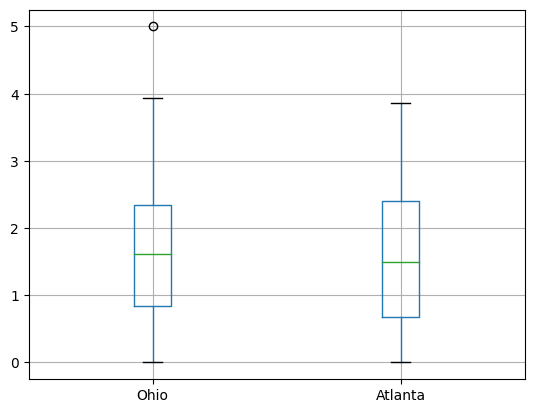

In [ ]:
df.boxplot()

In [ ]:
df.describe()

,Ohio,Atlanta
count,50.000000,50.000000
mean,1.746800,1.614800
std,1.092211,1.061068
min,0.000000,0.000000
25%,0.835000,0.682500
50%,1.615000,1.495000
75%,2.350000,2.402500
max,5.000000,3.860000
